In [1]:
import pandas as pd
import pvlib
import matplotlib.pyplot as plt

# Localisation à Lyon
latitude = 45.75
longitude = 4.85
# timezone
tz = 'Europe/Paris'

site = pvlib.location.Location(latitude, longitude, tz=tz) # Création d'un objet Location pour la localisation de Lyon, via pvlib

# Création index horaire 2023
times = pd.date_range(start='2023-01-01', end='2023-12-31 23:00:00', freq='h', tz=tz)

# Calcul de la position du soleil
solar_position = site.get_solarposition(times) # Pour chaque heure de l'année 2023, calcule la position du soleil à Lyon (azimut, zenith, etc.) via pvlib

# Irradiance claire ciel (GHI global horizontal irradiance, DNI irradiance normale direct, DHI irradiance horizontale diffuse) pour chaque heure de l'année 2023 à Lyon via pvlib
clearsky = site.get_clearsky(times) # get_clearsky s'exprime en W/m² dans le cas où il n'y a pas de nuages, c'est une estimation de l'irradiance solaire maximale que l'on peut attendre à un moment donné à un endroit donné

# Puissance installée
installed_power_kW = 500 # kWc, puissance crête, puissance maximale produite dans les conditions idéales (soleil à son zénith, pas de nuages, etc.) avec une irradiance de 1000 W/m²

# Hypothèse simple de rendement global 80%
pv_power = (clearsky['ghi']/1000) * installed_power_kW * 0.8 # On divise clearsky par 1000 pour avoir un facteur de conversion correct avec la puissance installée en kWc, et on multiplie par 0.8 pour prendre en compte les pertes

df_pv = pd.DataFrame({'pv_kW': pv_power, 'datetime' : times})
df_pv["datetime"] = pd.to_datetime(df_pv["datetime"], utc=True)
df_pv.set_index('datetime', inplace=True)
df_pv.head()


,pv_kW
datetime,
2022-12-31 23:00:00+00:00,0.0
2023-01-01 00:00:00+00:00,0.0
2023-01-01 01:00:00+00:00,0.0
2023-01-01 02:00:00+00:00,0.0
2023-01-01 03:00:00+00:00,0.0


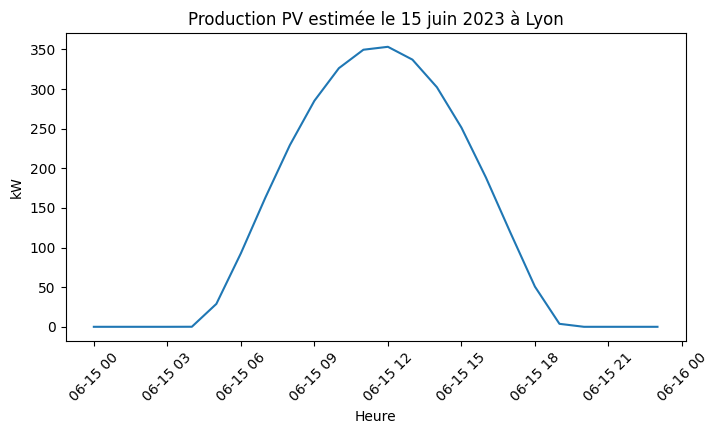

In [5]:
df_day = df_pv.loc["2023-06-15"]

plt.figure(figsize=(8, 4))
plt.plot(df_day.index, df_day['pv_kW'])
plt.title("Production PV estimée le 15 juin 2023 à Lyon")
plt.ylabel("kW")
plt.xlabel("Heure")
plt.xticks(rotation=45)
plt.show()

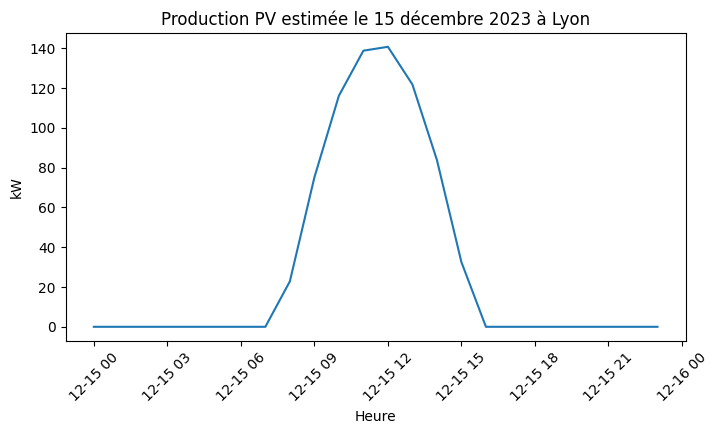

In [6]:
df_day = df_pv.loc["2023-12-15"]

plt.figure(figsize=(8, 4))
plt.plot(df_day.index, df_day['pv_kW'])
plt.title("Production PV estimée le 15 décembre 2023 à Lyon")
plt.ylabel("kW")
plt.xlabel("Heure")
plt.xticks(rotation=45)
plt.show()

In [7]:
df_pv.to_csv("../data/pv_simulation.csv", index = True)